In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics
import random
from random import randint
import time
import os
import numpy as np
from collections import namedtuple
import cv2
from pathlib import Path
import argparse
import os
import csv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras

In [2]:
folder_path_1 = "./data/이상(방화)"
folder_path_2 = "./data/이상(유기)"
folder_path_3 = "./data/이상(전도)"
folder_path_4 = "./data/이상(절도)"
folder_path_5 = "./data/이상(파손)"
folder_path_6 = "./data/이상(폭행)"
folder_path_7 = "./data/이상(흡연)"
#folder_path_7 = "./data/이상(교통약자)"
folder_path_8 = "./data/구매(구매)"
folder_path_9 = "./data/구매(반품)"
folder_path_10 = "./data/구매(비교)"
folder_path_11 = "./data/구매(선택)"

In [3]:
def concat(path):
    file_lst = os.listdir(path)
    df_list = []
    for file in file_lst:
        file_name = os.path.join(path, file)
        df = pd.read_csv(file_name)
        df = df[df.NUMOFBODIES != 0].reset_index(drop=True)
###
        if len(df) < 610:
            pad_length = 610 - len(df)
            pad_df = pd.DataFrame(0, index=range(len(df), 610), columns=df.columns)
            df = pd.concat([df, pad_df])
        df['index_num'] = df.index
###
        df_list.append(df)
    #concat_df = pd.concat(df_list, ignore_index=True)
    return df_list

In [4]:
file_lst = os.listdir(folder_path_1)
file_lst

['C_3_9_10_BU_DYA_08-02_14-26-46_CA_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYA_08-02_14-26-47_CB_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYA_08-02_14-26-47_CC_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYB_10-17_14-21-44_CA_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYB_10-17_14-21-44_CB_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYB_10-17_14-21-44_CC_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYB_10-17_14-21-44_CD_2D_DF2_F2.csv',
 'C_3_9_10_BU_DYB_10-17_14-21-44_CE_2D_DF2_F2.csv',
 'C_3_9_10_BU_SMA_09-20_13-32-22_CA_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMA_09-20_13-32-22_CB_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMA_09-20_13-32-22_CC_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMA_09-20_13-32-22_CD_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMB_09-02_11-11-51_CA_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMB_09-02_11-11-51_CB_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMB_09-02_11-11-51_CC_2D_DF2_M2.csv',
 'C_3_9_10_BU_SMB_09-02_11-11-51_CD_2D_DF2_M2.csv',
 'C_3_9_10_BU_SYA_09-24_14-48-44_CA_2D_DF2_M2.csv',
 'C_3_9_10_BU_SYA_09-24_14-48-44_CB_2D_DF2_M2.csv',
 'C_3_9_10_BU_SYA_09-24_14-48-44_CC_2D_DF2_M2.csv',
 'C_3_9_10_B

In [5]:
fire_mer = concat(folder_path_1)
yugi_mer = concat(folder_path_2)
jeon_mer = concat(folder_path_3)
theft_mer = concat(folder_path_4)
damage_mer = concat(folder_path_5)
violence_mer = concat(folder_path_6)
smoke_mer = concat(folder_path_7)
buy_mer = concat(folder_path_8)
refund_mer = concat(folder_path_9)
compar_mer = concat(folder_path_10)
select_mer = concat(folder_path_11)
#test_mer = pd.concat(test_mer, ignore_index=True)

In [ ]:
buy_mer = pd.concat(buy_mer, ignore_index=True)
refund_mer = pd.concat(refund_mer, ignore_index=True)
compar_mer = pd.concat(compar_mer, ignore_index=True)
select_mer = pd.concat(select_mer, ignore_index=True)
fire_mer = pd.concat(fire_mer, ignore_index=True)
yugi_mer = pd.concat(yugi_mer, ignore_index=True)
jeon_mer = pd.concat(jeon_mer, ignore_index=True)
theft_mer = pd.concat(theft_mer, ignore_index=True)
damage_mer = pd.concat(damage_mer, ignore_index=True)
violence_mer = pd.concat(violence_mer, ignore_index=True)
smoke_mer = pd.concat(smoke_mer, ignore_index=True)

In [ ]:
buy_mer['LABEL'] = 0
refund_mer['LABEL'] = 1
compar_mer['LABEL'] = 2
select_mer['LABEL'] = 3
fire_mer['LABEL'] = 4
yugi_mer['LABEL'] = 5
jeon_mer['LABEL'] = 6
theft_mer['LABEL'] = 7
damage_mer['LABEL'] = 8
violence_mer['LABEL'] = 9
smoke_mer['LABEL'] = 10

In [ ]:
mer_lst = [fire_mer,
            yugi_mer,
            jeon_mer,
            theft_mer,
            damage_mer,
            violence_mer,
            smoke_mer,
            buy_mer,
            refund_mer,
            compar_mer,
            select_mer]
full_data = pd.concat(mer_lst, ignore_index=True)
full_data.shape

(3750890, 57)

In [ ]:
# 데이터와 레이블을 추출합니다
label_data = full_data['LABEL']
data_without_label = full_data.drop(columns=[col for col in full_data.columns if "CONFIDENCE_LEVEL" in col or "spin" in col.lower()])
data_without_label = data_without_label.drop(['ID', 'TIMESTAMP', 'FRAME_NUM', 'LABEL', 'PELVIS_X', 'PELVIS_Y', 'NECK_X', 'NECK_Y'], axis=1)


In [14]:
data_without_label.head(10)

,NUMOFBODIES,SHOULDER_LEFT_X,SHOULDER_LEFT_Y,ELBOW_LEFT_X,ELBOW_LEFT_Y,WRIST_LEFT_X,WRIST_LEFT_Y,SHOULDER_RIGHT_X,SHOULDER_RIGHT_Y,ELBOW_RIGHT_X,...,ANKLE_LEFT_Y,HIP_RIGHT_X,HIP_RIGHT_Y,KNEE_RIGHT_X,KNEE_RIGHT_Y,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,HEAD_X,HEAD_Y,index_num
0,1,1278.1079,114.825320,1259.68320,171.31137,1241.9669,215.73785,1226.97250,114.992830,1220.18000,...,334.14374,1228.4524,203.73642,1207.98950,275.72427,1191.76420,341.46210,1257.8337,81.594730,0
1,1,1240.2539,110.277860,1237.18130,165.81174,1225.5015,210.13467,1183.58500,116.050810,1170.81820,...,334.11472,1193.4259,204.51294,1183.14620,274.82020,1178.65330,334.73154,1211.6045,82.707980,1
2,1,1212.6339,126.382416,1213.95890,184.40631,1210.9862,231.56741,1152.16580,122.803440,1141.23230,...,360.77667,1159.1150,219.64172,1150.11830,295.65607,1143.64160,366.48923,1186.4702,89.950500,2
3,1,1181.0144,127.760376,1186.65450,187.13950,1178.0974,236.86618,1122.35780,126.987976,1102.63810,...,371.67030,1125.3623,225.93182,1102.93850,302.86896,1106.12500,364.86044,1154.3636,92.412320,3
4,1,1146.0264,132.623500,1154.95450,188.39767,1145.7614,237.44797,1081.51370,130.622990,1064.93000,...,363.16370,1087.5433,230.94366,1072.58940,311.27646,1060.65250,384.18704,1116.1233,94.339420,4
5,1,1106.7562,133.512360,1114.76510,198.53070,1114.1066,251.99030,1037.67930,128.540800,1017.40216,...,383.37076,1052.1691,238.58942,1055.90560,320.79590,1061.89710,390.12524,1073.3724,91.784454,5
6,1,1077.3759,144.557590,1086.47270,213.88540,1093.7473,267.94540,1005.54680,138.375610,995.79690,...,427.82190,1024.4401,256.36430,1034.81000,347.58856,1049.66110,380.17206,1042.2883,97.986510,6
7,1,1036.1980,160.768860,1039.04020,228.61484,1037.0474,282.61536,970.92426,148.121300,955.99194,...,430.36786,983.0804,263.34464,983.72736,350.56427,996.20490,422.37042,1005.3209,111.472900,7
8,1,978.0879,166.679530,986.88696,242.42532,975.7191,302.14178,929.82040,159.843110,936.25120,...,428.61435,933.3855,275.02808,917.14880,367.81520,904.82730,450.72455,954.7878,113.792020,8
9,1,926.4144,155.247070,943.20306,234.80420,940.6257,299.28412,851.75030,149.082920,834.78735,...,452.38995,879.2576,280.13672,881.57590,376.60764,891.61676,454.25742,885.6244,103.907166,9


In [15]:
sequence_start_indices = full_data.index[full_data['index_num'] == 0].tolist()
sequence_lengths = [sequence_start_indices[i] - sequence_start_indices[i-1] for i in range(1, len(sequence_start_indices))]
sequence_lengths.insert(0, sequence_start_indices[0])

# Min sequence length
min_sequence_length = min(sequence_lengths)

In [16]:
min_sequence_length = 610

In [17]:
X_sequences = []
y_sequences = []

# Iterating over the start indices to create sequences
for i in range(len(sequence_start_indices) - 1):
    start_index = sequence_start_indices[i]
    end_index = sequence_start_indices[i + 1]

    # Ensure the sequence has the expected length before appending
    if end_index - start_index == min_sequence_length:
        X_sequence = data_without_label.iloc[start_index:end_index].values
        y_sequence = label_data.iloc[start_index:end_index].values
        X_sequences.append(X_sequence)
        y_sequences.append(y_sequence[-1])  # Taking the label of the last frame for the sequence

# Converting lists to numpy arrays
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

X_sequences.shape, y_sequences.shape


((6148, 610, 28), (6148,))

In [18]:
X_sequences[0][0:10]

array([[1.00000000e+00, 1.27810790e+03, 1.14825320e+02, 1.25968320e+03,
        1.71311370e+02, 1.24196690e+03, 2.15737850e+02, 1.22697250e+03,
        1.14992830e+02, 1.22018000e+03, 1.70837590e+02, 1.22434640e+03,
        2.10986850e+02, 1.25356790e+03, 2.07997130e+02, 1.24526120e+03,
        2.79811800e+02, 1.25431760e+03, 3.34143740e+02, 1.22845240e+03,
        2.03736420e+02, 1.20798950e+03, 2.75724270e+02, 1.19176420e+03,
        3.41462100e+02, 1.25783370e+03, 8.15947300e+01, 0.00000000e+00],
       [1.00000000e+00, 1.24025390e+03, 1.10277860e+02, 1.23718130e+03,
        1.65811740e+02, 1.22550150e+03, 2.10134670e+02, 1.18358500e+03,
        1.16050810e+02, 1.17081820e+03, 1.69324620e+02, 1.16411400e+03,
        2.11204440e+02, 1.22361870e+03, 2.02605900e+02, 1.20440880e+03,
        2.72980740e+02, 1.20085930e+03, 3.34114720e+02, 1.19342590e+03,
        2.04512940e+02, 1.18314620e+03, 2.74820200e+02, 1.17865330e+03,
        3.34731540e+02, 1.21160450e+03, 8.27079800e+01, 1.00000

In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_sequences, y_sequences, test_size=0.3, random_state=48)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=48)

In [20]:
print(X_train.shape, y_train.shape)

(4303, 610, 28) (4303,)


In [21]:
print(X_temp.shape, y_temp.shape)

(1845, 610, 28) (1845,)


In [22]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [23]:
X_train

array([[[ 1.0000000e+00,  8.2501117e+02,  6.6747925e+02, ...,
          9.0358429e+02,  6.1993231e+02,  0.0000000e+00],
        [ 1.0000000e+00,  8.4893811e+02,  6.3457910e+02, ...,
          9.3608234e+02,  5.7626837e+02,  1.0000000e+00],
        [ 1.0000000e+00,  9.9132300e+02,  6.2105475e+02, ...,
          9.2728735e+02,  5.4560529e+02,  2.0000000e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  6.0700000e+02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  6.0800000e+02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  6.0900000e+02]],

       [[ 1.0000000e+00,  1.5075542e+03,  6.3349182e+02, ...,
          1.5404219e+03,  5.0529517e+02,  0.0000000e+00],
        [ 1.0000000e+00,  1.2979573e+03,  5.7342877e+02, ...,
          1.3892554e+03,  4.7509378e+02,  1.0000000e+00],
        [ 1.0000000e+00, 

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련 데이터에 대한 샘플 가중치 마스크 생성
# 패딩이 아닌 값은 1, 패딩된 값은 0
sample_weight_train = np.where(X_train != 0, 1, 0)
sample_weight_train = sample_weight_train.max(axis=-1)

# 각 시퀀스에 대한 평균 샘플 가중치 계산
sample_weight_train_avg = sample_weight_train.mean(axis=1)

In [25]:
model_file_path = "./model/sum_all_32.h5"
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_file_path)
# - 자동 훈련 멈추기 함수 사용 : 추가 훈련 epoch 2회, 가중치 업데이트
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                        restore_best_weights=True)


# 4. Model Training
# 모델 훈련
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000,
                    batch_size=128, sample_weight=sample_weight_train_avg,
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 5. Model Evaluation
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/1000
34/34 [==============================] - 105s 3s/step - loss: 2.0131 - accuracy: 0.2640 - val_loss: 1.7040 - val_accuracy: 0.3153
Epoch 2/1000
34/34 [==============================] - 107s 3s/step - loss: 1.6790 - accuracy: 0.3546 - val_loss: 1.6600 - val_accuracy: 0.3362
Epoch 3/1000
34/34 [==============================] - 109s 3s/step - loss: 1.5396 - accuracy: 0.4074 - val_loss: 1.5637 - val_accuracy: 0.3757
Epoch 4/1000
34/34 [==============================] - 111s 3s/step - loss: 1.5561 - accuracy: 0.3839 - val_loss: 1.6036 - val_accuracy: 0.3555
Epoch 5/1000
34/34 [==============================] - 110s 3s/step - loss: 1.6621 - accuracy: 0.3209 - val_loss: 1.6486 - val_accuracy: 0.3416
Epoch 6/1000
34/34 [==============================] - 113s 3s/step - loss: 1.6209 - accuracy: 0.3363 - val_loss: 1.5830 - val_accuracy: 0.3540
Epoch 7/1000
34/34 [==============================] - 113s 3s/step - loss: 1.5799 - accuracy: 0.3579 - val_loss: 1.6096 - val_accuracy: 0.3416

In [27]:
from keras.models import load_model
model1 = load_model('./model/sum_all_32.h5')

In [28]:
X_sequences, y_sequences
X_val = X_sequences.astype(np.float32)
y_val = y_sequences.astype(np.float32)

In [29]:
# 유니크한 종속변수들을 얻습니다.
unique_targets = np.unique(y_val)

# 테스트 데이터에 대한 예측을 한 번만 수행
test_preds = model1.predict(X_val)
test_pred_idx = [np.argmax(pred) for pred in test_preds]

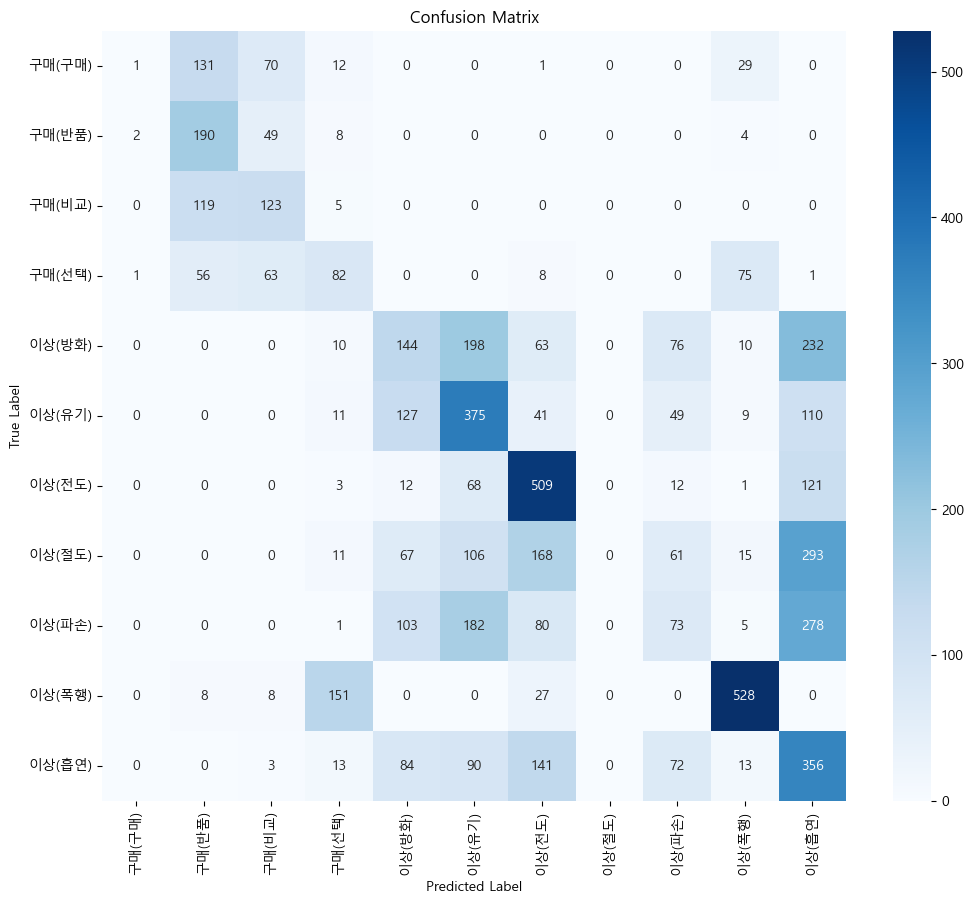

F1 Score: 0.34249566698111694

Classification Report:
               precision    recall  f1-score   support

         0.0       0.25      0.00      0.01       244
         1.0       0.38      0.75      0.50       253
         2.0       0.39      0.50      0.44       247
         3.0       0.27      0.29      0.28       286
         4.0       0.27      0.20      0.23       733
         5.0       0.37      0.52      0.43       722
         6.0       0.49      0.70      0.58       726
         7.0       0.00      0.00      0.00       721
         8.0       0.21      0.10      0.14       722
         9.0       0.77      0.73      0.75       722
        10.0       0.26      0.46      0.33       772

    accuracy                           0.39      6148
   macro avg       0.33      0.39      0.33      6148
weighted avg       0.33      0.39      0.34      6148



c:\Users\de31\anaconda3\envs\lp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\de31\anaconda3\envs\lp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\de31\anaconda3\envs\lp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

cate = ['구매(구매)', '구매(반품)', '구매(비교)', '구매(선택)',
        '이상(방화)',
        '이상(유기)',
        '이상(전도)',
        '이상(절도)',
        '이상(파손)',
        '이상(폭행)',
        '이상(흡연)']

def plot_confusion_matrix_with_labels(y_true, y_pred, labels):
    """
    Plot confusion matrix with custom labels.
    """
    matrix = confusion_matrix(y_true, y_pred, labels=np.arange(len(labels)))
    plt.figure(figsize=(12, 10))
    ax=sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# 실제 레이블과 예측 레이블 (y_val와 test_pred_idx)을 사용하여 Confusion Matrix를 시각화합니다.
plot_confusion_matrix_with_labels(y_val, test_pred_idx, cate)

# F1 Score를 계산합니다.
f1 = f1_score(y_val, test_pred_idx, average='weighted')

# 결과를 출력합니다.
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_val, test_pred_idx))
